In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #뉴메리컬파이썬 즉 뉴메리커메서드에 대한 라이브러리 수치해석,벡터연산 등
import pandas as pd #데이터프레임, sql같은거 다루는것
import matplotlib.pyplot as plt # 데이터 비쥬얼라이제이션
import seaborn as sns # 비쥬얼라이제이션
import os

plt.style.use('seaborn') #seaborn 스타일로하고
sns.set(font_scale=2.5) #폰트는 2.5크기

import missingno as msno #null데이터 쉽게 보여주는 라이브러리

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline #원래는 맷플롯 새로운 창이 뜨는데 인라인으로 진행하면 여기 커널에 바로뜬다

UsageError: unrecognized arguments: #원래는 맷플롯 새로운 창이 뜨는데 인라인으로 진행하면 여기 커널에 바로뜬다


In [10]:
os.getcwd() #현재 디렉토리 위치 확인

'C:\\Users\\jehyeong\\Desktop\\Kaggle\\1st level. Titanic Machine Learning from Disaster'

## 내 노트북 실습파일에 디렉토리 위치 옮겨가면서 csv불러온거 한번 더 체크 혹은 파일위치 주소 붙여 넣어서 디렉토리가 어디있든 바로 불러오는 것도 체크

캐글데이터는 정제가 잘 되어있지만 null 데이터가 좀 있으니까 이런거 처리 해줘야한다.
데이터분석의 시작은 데이터셋을 불러오고 살펴보는게 먼저이다.
머신러닝을 위한 sklearn은 꼭 공부해야함 -> 머신러닝 하는데 sklearn을 모른다 그럼 안하는거다.

In [18]:
df_train=pd.read_csv('titanic/train.csv')
df_test=pd.read_csv('titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_train.shape #891개 로우 12개 열

(891, 12)

In [28]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [45]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [38]:
df_train[col].isnull().sum() # False+False=0 , True+True=2 즉 Ture가2개있단뜻 즉,null데이터 가진게 2명이란뜻

2

In [42]:
df_train[col].shape[0] #df_train[col]은 891로우이고 shpae[0]은 첫번째데이터값이니까 891

891

In [46]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

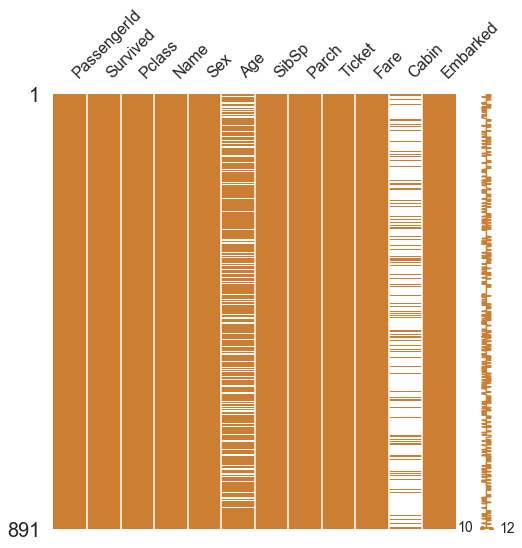

In [48]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) #즉 빈칸이 null값이다.

In [53]:
df_train.iloc[2:4,3:5] #앞에껀 행뒤에껀 열

,Name,Sex
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


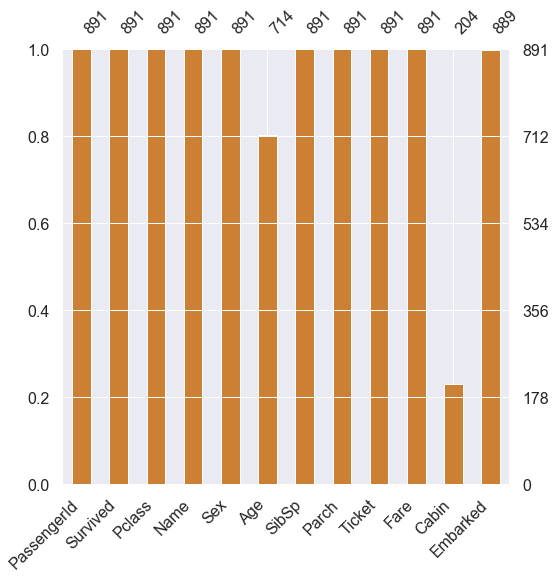

In [55]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))